In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.neighbors import KNeighborsClassifier

##########데이터 로드

fish_df = pd.read_csv('./data/fish_pre.csv')
labels = ['빙어','도미']

##########데이터 분석

##########데이터 전처리

#### 스케일링
y_target = fish_df['Label']
X_data = fish_df.drop(['Label'],axis=1)

x_train, x_test, y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=42,stratify=y_target)

#### 스케일링

ss_scaler = StandardScaler()
x_train_scaled= ss_scaler.fit_transform(x_train)
x_test_scaled = ss_scaler.transform(x_test)

x_train_scaled_df = pd.DataFrame(data = x_train_scaled, columns=['길이', '무게'])
#x_train_scaled_df


##########모델 생성

model = KNeighborsClassifier()

##########모델 학습

model.fit(x_train_scaled, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트
y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=labels))

##########모델 예측

x_real = np.array([
    # [31.5, 496] # 도미
    [25,150]
]
)

# 실제 데이터에 대해서도 훈련때와 동일한 스케일 작업을 진행진행
#################################################
x_real_scaled = ss_scaler.transform(x_real) 
#################################################
y_predict = model.predict(x_real_scaled)

label = labels[y_predict[0]]
y_predict = model.predict_proba(x_real_scaled)
confidence = y_predict[0][y_predict[0].argmax()]

print(f'분류결과:{label} {confidence}')

훈련_Accuracy: 0.6875
테스트_Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

          빙어       0.00      0.00      0.00         4
          도미       0.73      1.00      0.85        11

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15

분류결과:도미 1.0


In [5]:
x_real_scaled

array([[-0.15930411, -0.8680124 ]])

In [6]:
# 주변샘플을 살펴보면
model.predict(x_real_scaled)
dist, indexes = model.kneighbors(x_real_scaled)

idx = indexes.tolist()[0]
kne = x_train_scaled_df.iloc[idx]
kne

,길이,무게
22,0.230580,-0.208108
10,0.328051,-0.124458
26,0.522993,-0.279365
3,0.230580,-0.000532
11,0.328051,0.061430


In [48]:
type(x_real_scaled),x_real_scaled

(numpy.ndarray, array([[-0.15930411, -0.8680124 ]]))

In [49]:
x_real_scaled.squeeze()[0] # 길이

-0.15930410912141546

In [50]:
x_real_scaled.squeeze()[1] # 무게

-0.8680123979206747

In [7]:
indexes.tolist()[0]

[22, 10, 26, 3, 11]

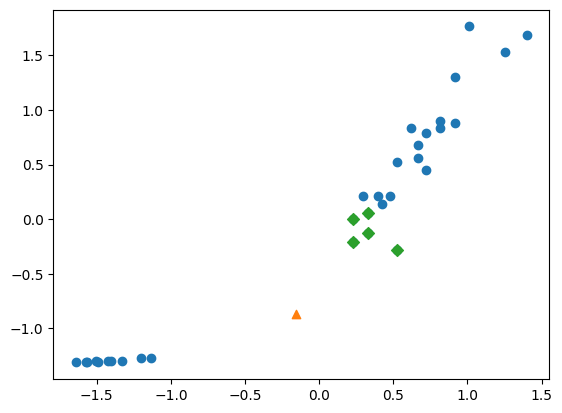

In [8]:
import matplotlib.pyplot as plt

#스케터 차트그리기
plt.scatter(x_train_scaled_df['길이'],x_train_scaled_df['무게']) #훈련데이터
plt.scatter(x_real_scaled.squeeze()[0] ,x_real_scaled.squeeze()[1] ,marker='^')              # 새로운 데이터
plt.scatter(kne['길이'],kne['무게'],marker='D')
plt.show()

```
도미로 분류되었네~~

```